# Project: Banks - Customer segmentation 
## Задание по проекту
   
* *Часть 1. EDA и Preprocessing*
    - 1.Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit;
    - 2.Проведите EDA, чтобы познакомиться с признаками;
    - 3.Преобразуйте все признаки в числовые подходящими методами;
    - 4.Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации).
* *Часть 2. Моделирование*
    - 1.Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot;
    - 2.Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости.
* *Часть 3. Интерпретация.*
    - 1.Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности?
    - 2.Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать?

## Description of data 
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


## Project structure (task decomposition)

### 1. [Exploratory Data Analysis (EDA)](#analysis)
   * [1.1. Loading and primary data processing
      (duplicates, missing values, structures and data types, etc.)](#analysis1)
   * [1.2. EDA: study of distributions of numerical/categorical features, correlation analysis.](#analysis2)

### 2. [User segmentation/clustering with ML (DBSCAN, Kmeans, Agglomerative Clustering](#segmentation)

### 3. [Conclusions and basic recommendations for segments](#conclusion)

<a id="analysis"></a>
## 1. Exploratory Data Analysis (EDA) 

<a id="analysis1"></a>
### 1.1. Loading and primary data processing 

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopy
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from plot_metric.functions import BinaryClassification
import itertools
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import tensorflow as tensorflow
from keras import metrics
import pickle
import sweetviz as sw
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.utils import class_weight
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,\
                            precision_recall_curve, roc_curve, classification_report, confusion_matrix,\
                            mean_squared_error, mean_absolute_error, fbeta_score, make_scorer, r2_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# remove the limit on the number and width of columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Load the table from an external drive
#file_id = '1-35_OWX6PuDkGGcVA4O-jUvaA_1SKnbh_Xyl1Knpk0M'
#download_link = f'https://drive.google.com/uc?id={file_id}'
#data = pd.read_csv(download_link)
#data

url="https://getfile.dokpub.com/yandex/get/https://disk.yandex.com/d/idxXl6C2s2pqvQ"
data=pd.read_csv(url, sep=',')
data= data.drop('Unnamed: 0', axis=1)
data

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0    67   male    2    own     NaN             little           1169            
1    22   female  2    own     little          moderate         5951            
2    49   male    1    own     little          NaN              2096            
3    45   male    2    free    little          little           7882            
4    53   male    2    free    little          little           4870            
..   ..    ...   ..     ...       ...             ...            ...            
995  31   female  1    own     little          NaN              1736            
996  40   male    3    own     little          little           3857            
997  38   male    2    own     little          NaN              804             
998  23   male    2    free    little          little           1845            
999  27   male    2    own     moderate        moderate         4576            

     Duration              Purpose  
0    6         radio/TV             
1    48        radio/TV             
2    12        education            
3    42        furniture/equipment  
4    24        car                  
..   ..        ...                  
995  12        furniture/equipment  
996  30        car                  
997  12        radio/TV             
998  45        radio/TV             
999  45        car                  

[1000 rows x 9 columns]

In [5]:
# Check structure, data types, data completeness and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
# Check for complete duplicates
data.duplicated().sum()

0

In [7]:
data.Purpose.nunique()

8

In [8]:
data.Housing.nunique()

3

In [9]:
data.Job.nunique()

4

* Overall, the data is of good quality. Not much pre-processing required
* Data types are correct and do not require conversion
* There are no obvious duplicates
* We will replace all column names with lowercase letters for convenience
* Missing values are observed only for the Saving/Checking accounts column, which is absolutely normal and understandable in case the account does not exist.
* I would suggest to replace NaN with a marker, and also label existing values Little/Moderate. OneHot encoding would be the best here, as there are not so many unique values of each. 
* Sex, housing columns will be labeled to categories. 
* The column purpose could be labeled as well (to be investigated)
* I would also add an age groups for macro analysis during segmentation

In [10]:
data.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000
mean   35.546000    1.904000     3271.258000    20.903000  
std    11.375469    0.653614     2822.736876    12.058814  
min    19.000000    0.000000     250.000000     4.000000   
25%    27.000000    2.000000     1365.500000    12.000000  
50%    33.000000    2.000000     2319.500000    18.000000  
75%    42.000000    2.000000     3972.250000    24.000000  
max    75.000000    3.000000     18424.000000   72.000000

In [11]:
# Convert all column names to lowercase
data.columns = [x.lower() for x in data.columns]
data = data.copy()
data.rename(columns = {'saving accounts':'saving_acc',
                       'checking account':'checking_acc',
                       'credit amount':'credit_amount'
                        }, inplace = True) 
data.head()

age     sex  job housing saving_acc checking_acc  credit_amount  duration  \
0  67   male    2    own     NaN        little       1169           6          
1  22   female  2    own     little     moderate     5951           48         
2  49   male    1    own     little     NaN          2096           12         
3  45   male    2    free    little     little       7882           42         
4  53   male    2    free    little     little       4870           24         

               purpose  
0  radio/TV             
1  radio/TV             
2  education            
3  furniture/equipment  
4  car

<a id="analysis2"></a>
### 1.2. EDA: feature distribution, correlation analysis

In [12]:
# Additional (automatic) EDA
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Another automatic EDA
repo=sw.analyze(data)
repo.show_html('output.html', open_browser=True)

                                             |          | [  0%]   00:00 -> (? left)

Report output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
# See what the data looks like statistically (average, standard deviation, min and max values)
data.describe().round(1)

age     job  credit_amount  duration
count  1000.0  1000.0  1000.0         1000.0  
mean   35.5    1.9     3271.3         20.9    
std    11.4    0.7     2822.7         12.1    
min    19.0    0.0     250.0          4.0     
25%    27.0    2.0     1365.5         12.0    
50%    33.0    2.0     2319.5         18.0    
75%    42.0    2.0     3972.2         24.0    
max    75.0    3.0     18424.0        72.0

In [15]:
# See if the overall correlation matrix and matrix heatmap show anything
data.corr().round(2)

age   job  credit_amount  duration
age            1.00  0.02  0.03          -0.04    
job            0.02  1.00  0.29           0.21    
credit_amount  0.03  0.29  1.00           0.62    
duration      -0.04  0.21  0.62           1.00

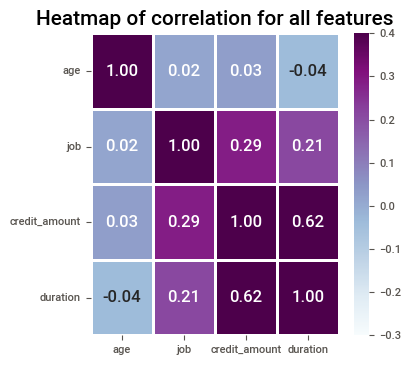

In [16]:
# Apply the heatmap method to display the correlation matrix in the form of a heat map of the relationship of all available features with each other
corr_m=data.corr()
plt.figure(figsize = (4,4))
sns.heatmap(data=corr_m, annot = True, linewidths=1, linecolor='white',cmap="BuPu", fmt='.2f', vmax=0.4, vmin=-0.3, cbar=True, annot_kws={"size": 12})
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.title('Heatmap of correlation for all features', fontsize=15)
plt.show()

* Of course, there is a high correlation between credit_amount and duration (0,62)
* Significant correlation between Job and credit_amount (0,29), as well as with duration (0,21)


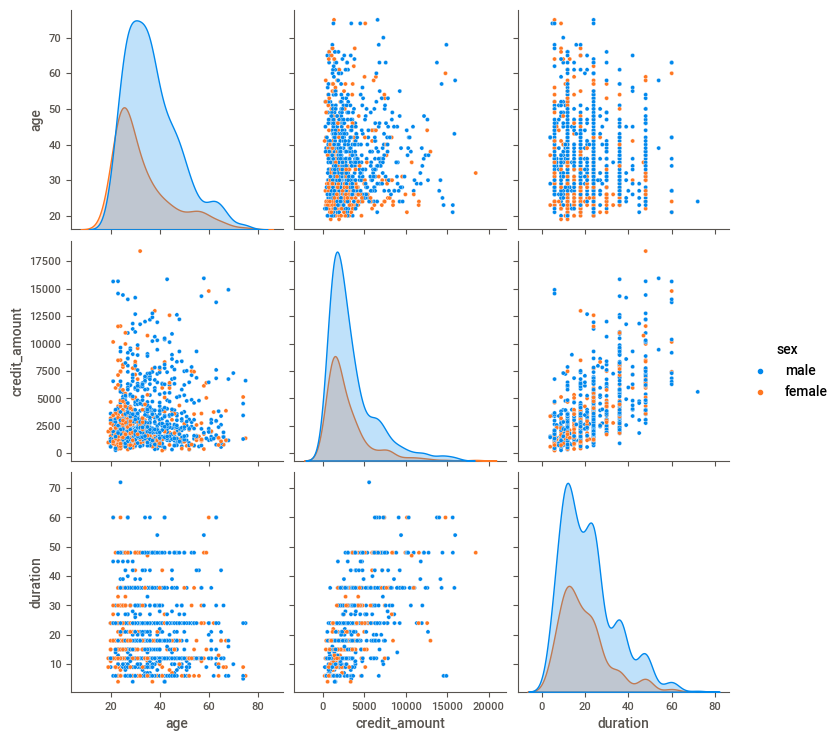

In [17]:
# Pairplot for some features based on client location (city)
sns.pairplot(vars = ['age', 'credit_amount', 'duration'], data=data, hue= 'sex')
plt.show()

In [18]:
data.head(1)

age   sex  job housing saving_acc checking_acc  credit_amount  duration  \
0  67   male  2    own     NaN        little       1169           6          

    purpose  
0  radio/TV

* To reflect the general distribution of data, we will construct graphs of two types:
     - for continuous quantities we will build boxplots
     - for discrete and binary - countplots
     - before that we add an age group, as it was agreed above

In [19]:
data['age'] = data['age'].astype('int64')
def age_group(age):
    """
    This function defines in which age_group a customer is.
    """    
    if age < 30:
        return '< 30'
    elif 30 < age <= 50:
        return '30-50'
    else:
        return '> 50'

data['age_group'] = data['age'].apply(age_group)

In [20]:
data['saving_acc'] = data['saving_acc'].fillna('no_acc')
data['checking_acc'] = data['checking_acc'].fillna('no_acc')

In [21]:
data.head(2)

age     sex  job housing saving_acc checking_acc  credit_amount  duration  \
0  67   male    2    own     no_acc     little       1169           6          
1  22   female  2    own     little     moderate     5951           48         

    purpose age_group  
0  radio/TV  > 50      
1  radio/TV  < 30

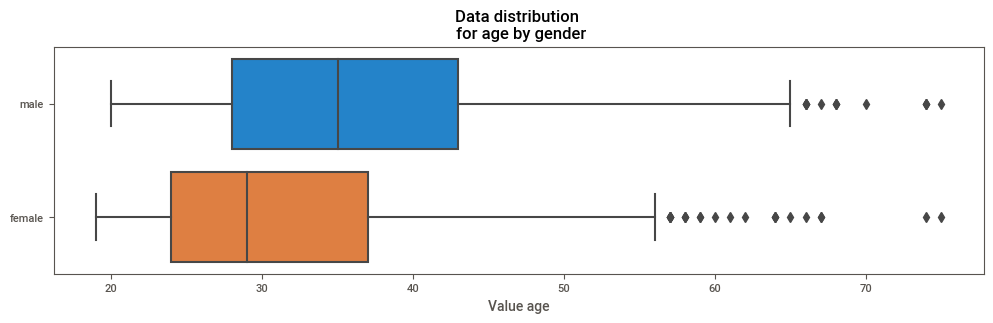

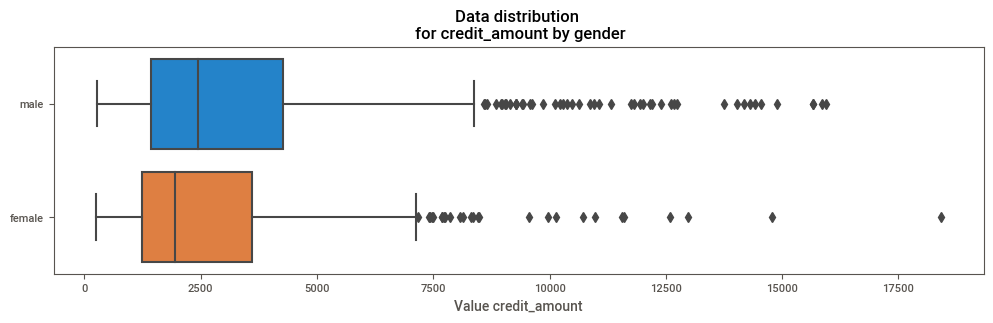

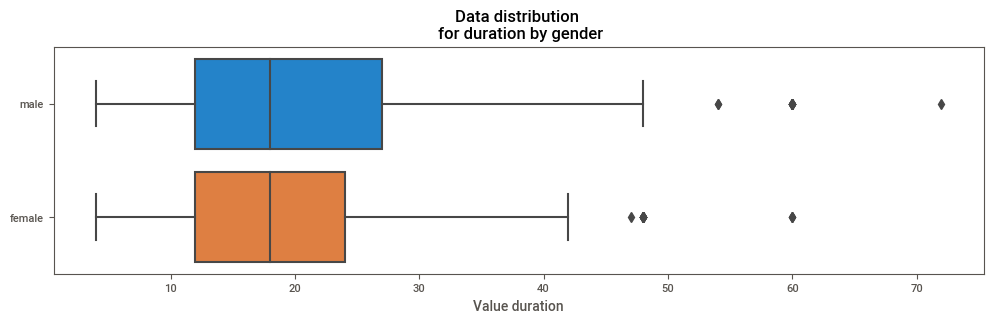

In [22]:
for column in data [['age', 'credit_amount', 'duration']]:
    fig,ax = plt.subplots(figsize=(12,3))
    ax=sns.boxplot(data[column], data.sex, ax=ax,  orient='h', saturation=0.7)
    plt.title('Data distribution \n for '+ str(column) + ' by gender')
    plt.xlabel('Value ' + column)
    plt.ylabel('')
    plt.show()

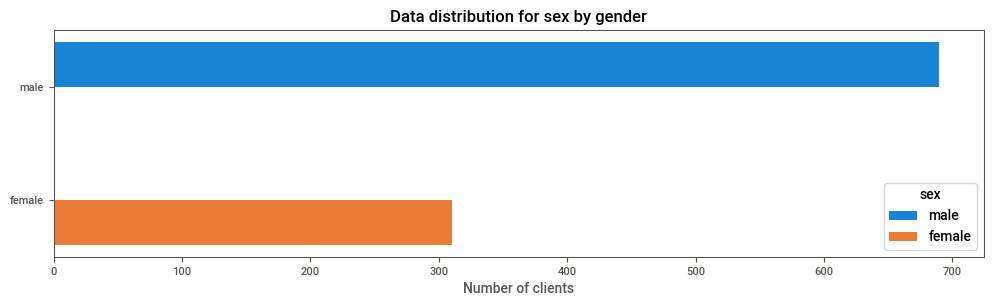

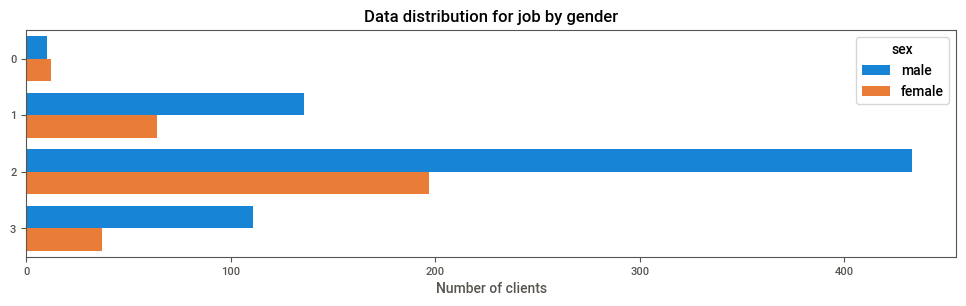

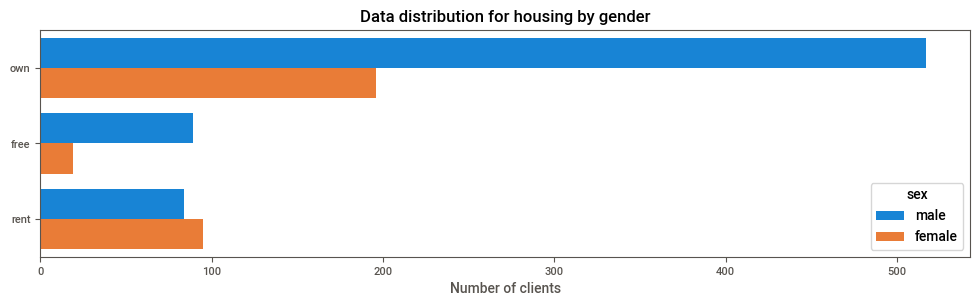

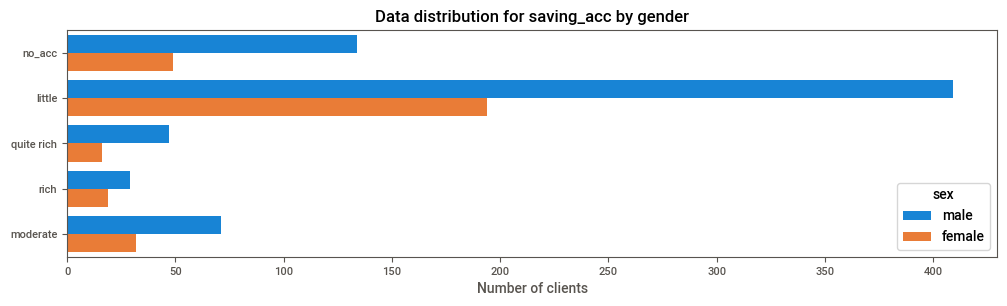

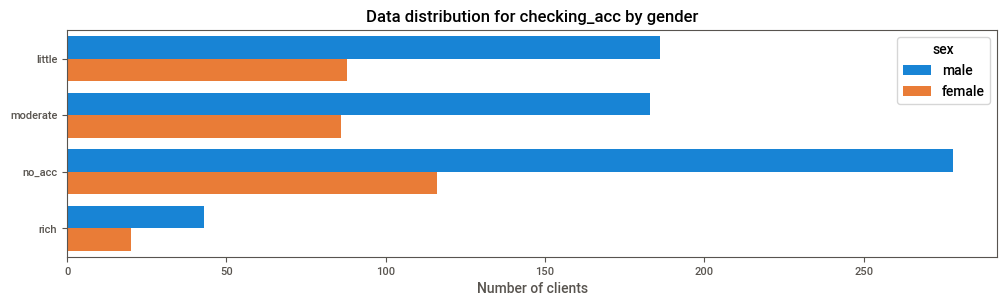

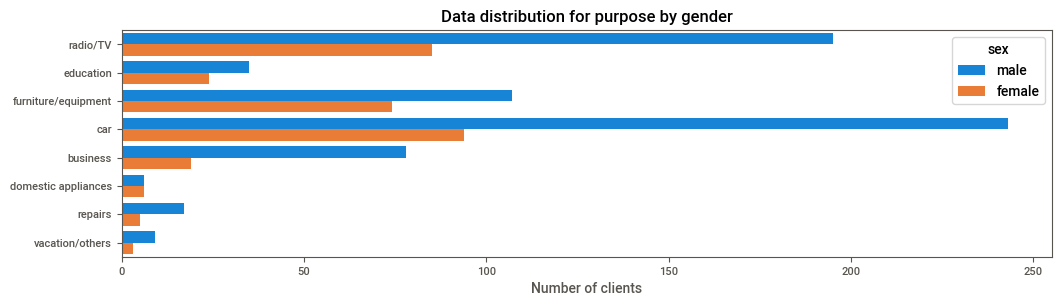

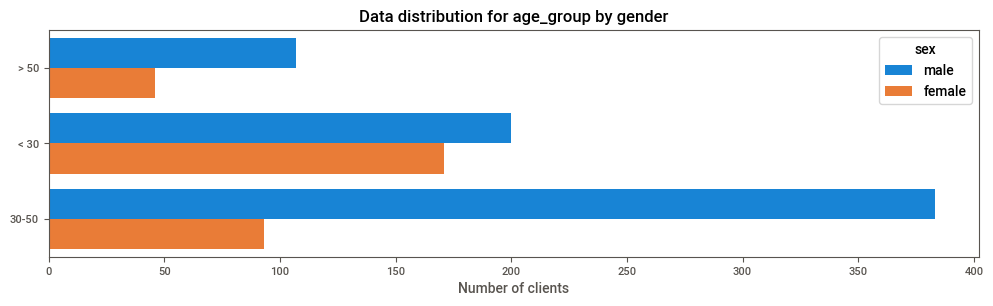

In [23]:
# for discrete and binary quantities we use countplot diagram
for column in data.drop(['age', 'credit_amount', 'duration'],axis=1).columns:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.countplot(y=column, hue='sex', data=data, ax=ax, saturation=0.8, orient ='h')
    plt.title('Data distribution for '+ str(column) + ' by gender')
    plt.xlabel('Number of clients')
    plt.ylabel('')
    plt.show()

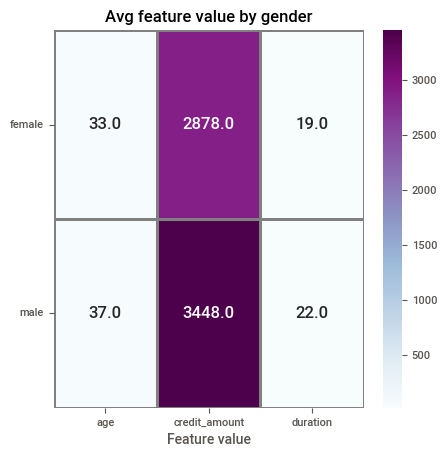

In [24]:
# Look at some features by gender
plt.figure(figsize = (5,5))
sns.heatmap(data=data.groupby(['sex'])['age', 'credit_amount', 'duration']\
            .mean().round().sort_values(by='duration'), annot = True\
            ,linewidths=1, linecolor='grey',cmap="BuPu", fmt='.1f', annot_kws={"size": 12})
plt.xticks(rotation=0) 
plt.yticks(rotation=0)
plt.title('Avg feature value by gender')
plt.ylabel('')
plt.xlabel('Feature value')
plt.show()

* Male customers have bigger amount, and a longer credit term/duration. Also they are older by age.

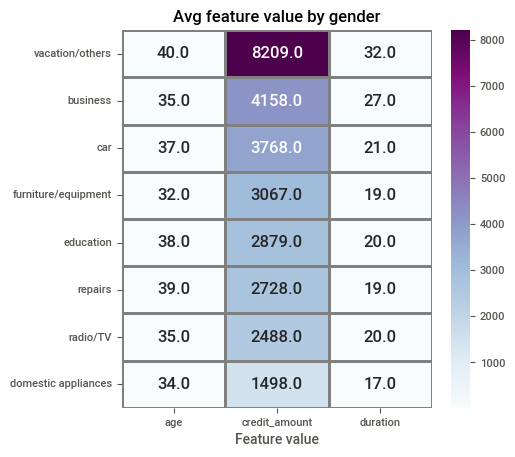

In [25]:
# Look at some features by gender
plt.figure(figsize = (5,5))
sns.heatmap(data=data.groupby(['purpose'])['age', 'credit_amount', 'duration']\
            .mean().round().sort_values(by='credit_amount', ascending =False), annot = True\
            ,linewidths=1, linecolor='grey',cmap="BuPu", fmt='.1f', annot_kws={"size": 12})
plt.xticks(rotation=0) 
plt.yticks(rotation=0)
plt.title('Avg feature value by gender')
plt.ylabel('')
plt.xlabel('Feature value')
plt.show()

* The credit amount for vacation is the biggest, and the duration for this purpose is the longest

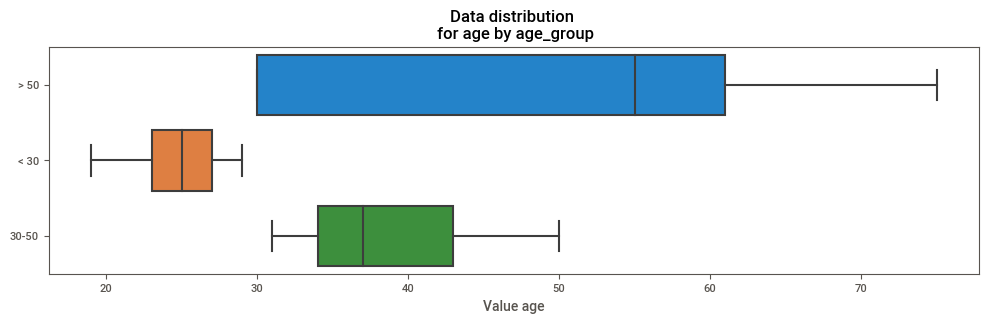

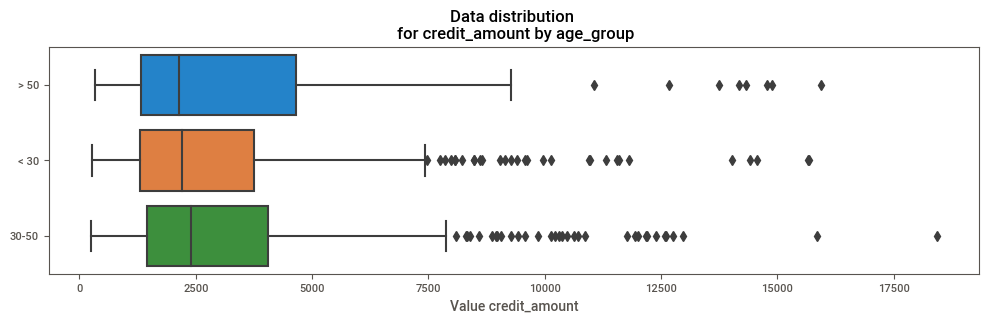

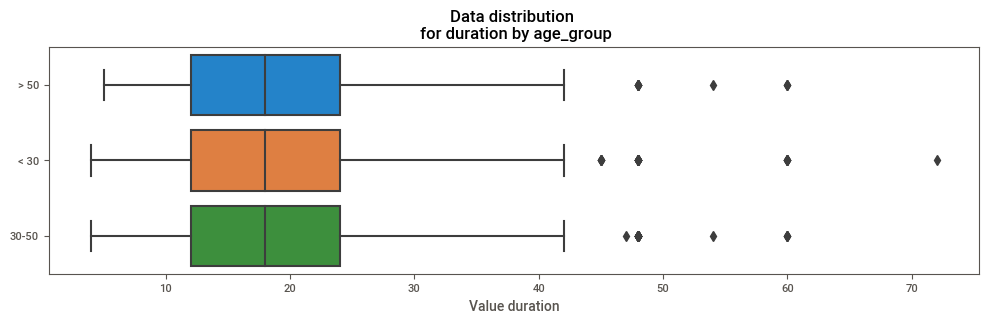

In [26]:
for column in data [['age', 'credit_amount', 'duration']]:
    fig,ax = plt.subplots(figsize=(12,3))
    ax=sns.boxplot(data[column], data.age_group, ax=ax,  orient='h', saturation=0.7)
    plt.title('Data distribution \n for '+ str(column) + ' by age_group')
    plt.xlabel('Value ' + column)
    plt.ylabel('')
    plt.show()

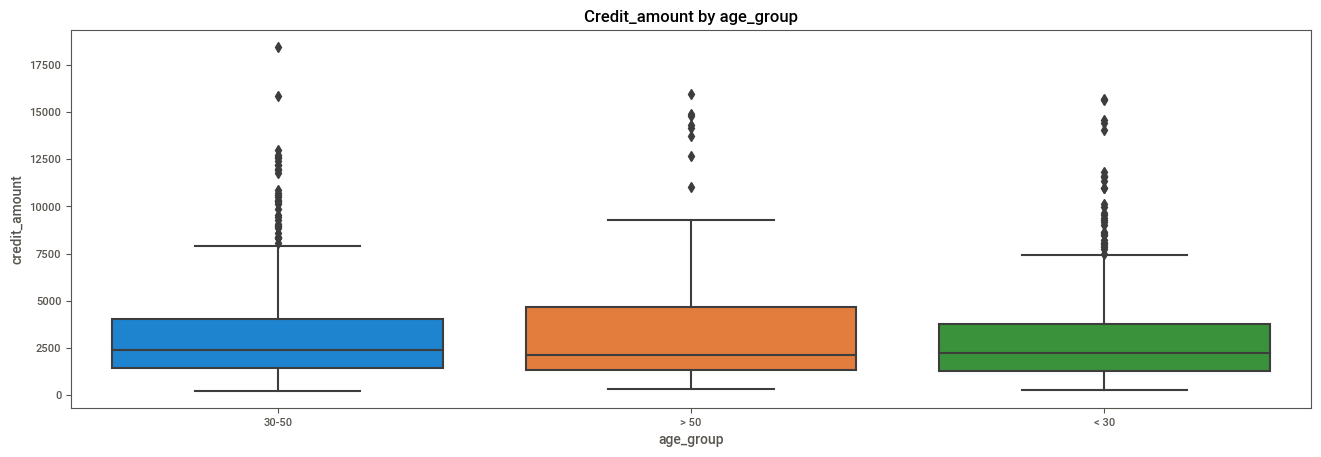

In [27]:
plt.figure(figsize = (16,5))
ax = sns.boxplot(x="age_group", y="credit_amount", data=data.sort_values(by='credit_amount', ascending =False))
plt.title('Credit_amount by age_group')
#ax.set_ylim([0, 0])
plt.show()

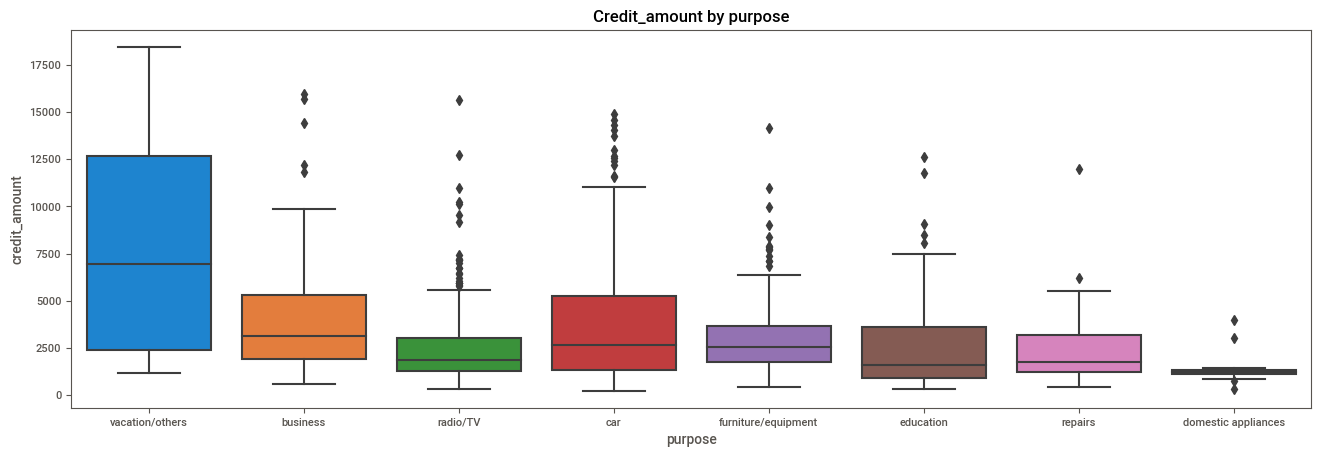

In [28]:
plt.figure(figsize = (16,5))
ax = sns.boxplot(x="purpose", y="credit_amount", data=data.sort_values(by='credit_amount', ascending =False))
plt.title('Credit_amount by purpose')
#ax.set_ylim([0, 0])
plt.show()

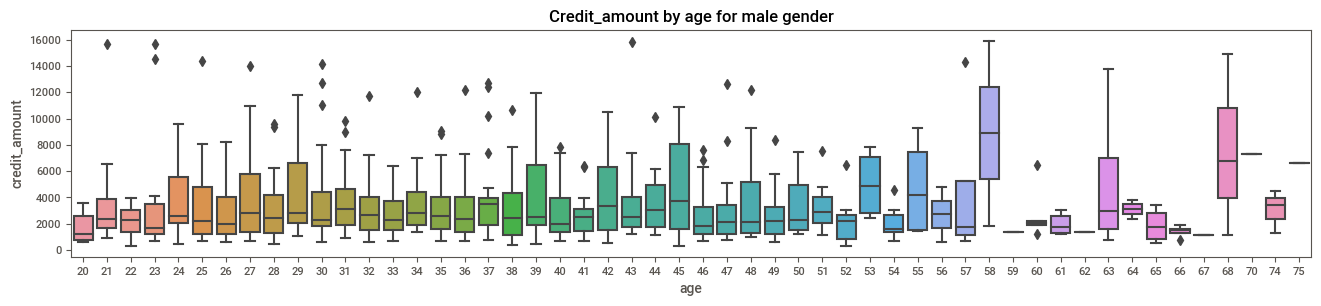

In [29]:
plt.figure(figsize = (16,3))
ax = sns.boxplot(x="age", y="credit_amount", data=data.query('sex == "male"'))
plt.title('Credit_amount by age for male gender')
#ax.set_ylim([0, 0])
plt.show()

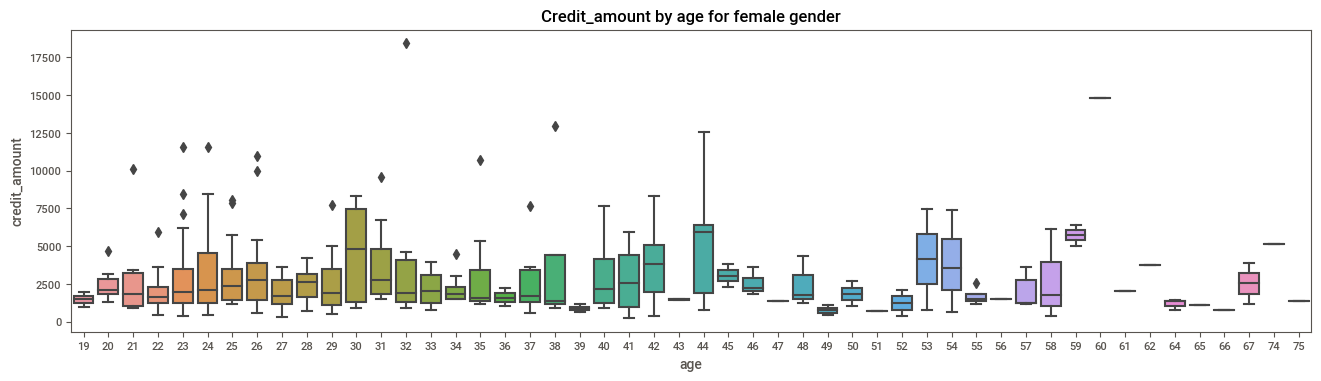

In [30]:
plt.figure(figsize = (16,4))
ax = sns.boxplot(x="age", y="credit_amount", data=data.query('sex == "female"'))
plt.title('Credit_amount by age for female gender')
#ax.set_ylim([0, 0])
plt.show()

* Many interesting and obvious observations, already mentioned above
* At the same time, there is not significant and clear observable difference which could be sufficient to devide the data points by clusters
* We will see if the ML unsupervised learning can really work in these conditions

<a id="segmentation"></a>
## 2. User segmentation/clustering with ML 

See if ML clustering gives us any additional information

In [31]:
data.head()

age     sex  job housing saving_acc checking_acc  credit_amount  duration  \
0  67   male    2    own     no_acc     little       1169           6          
1  22   female  2    own     little     moderate     5951           48         
2  49   male    1    own     little     no_acc       2096           12         
3  45   male    2    free    little     little       7882           42         
4  53   male    2    free    little     little       4870           24         

               purpose age_group  
0  radio/TV             > 50      
1  radio/TV             < 30      
2  education            30-50     
3  furniture/equipment  30-50     
4  car                  > 50

In [32]:
# Change/code the gender
data.loc[(data['sex'] == 'male'), 'sex'] = 0
data.loc[(data['sex'] == 'female'), 'sex'] = 1

In [33]:
data.loc[(data['age_group'] == '< 30'), 'age_group'] = 0
data.loc[(data['age_group'] == '30-50'), 'age_group'] = 1
data.loc[(data['age_group'] == '> 50'), 'age_group'] = 2

In [34]:
from category_encoders import OneHotEncoder

In [35]:
enc = OneHotEncoder()
enc.fit_transform(data[['housing', 'saving_acc', 'checking_acc', 'purpose']])
data_enc = data.drop(['housing', 'saving_acc', 'checking_acc', 'purpose'], axis = 1).\
    join(enc.fit_transform(data[['housing', 'saving_acc', 'checking_acc', 'purpose']], axis = 0))
data_enc.head()

age sex  job  credit_amount  duration age_group  housing_1  housing_2  \
0  67   0   2    1169           6         2         1          0           
1  22   1   2    5951           48        0         1          0           
2  49   0   1    2096           12        1         1          0           
3  45   0   2    7882           42        1         0          1           
4  53   0   2    4870           24        2         0          1           

   housing_3  saving_acc_1  saving_acc_2  saving_acc_3  saving_acc_4  \
0  0          1             0             0             0              
1  0          0             1             0             0              
2  0          0             1             0             0              
3  0          0             1             0             0              
4  0          0             1             0             0              

   saving_acc_5  checking_acc_1  checking_acc_2  checking_acc_3  \
0  0             1               0               0                
1  0             0               1               0                
2  0             0               0               1                
3  0             1               0               0                
4  0             1               0               0                

   checking_acc_4  purpose_1  purpose_2  purpose_3  purpose_4  purpose_5  \
0  0               1          0          0          0          0           
1  0               1          0          0          0          0           
2  0               0          1          0          0          0           
3  0               0          0          1          0          0           
4  0               0          0          0          1          0           

   purpose_6  purpose_7  purpose_8  
0  0          0          0          
1  0          0          0          
2  0          0          0          
3  0          0          0          
4  0          0          0

In [36]:
# We need to scale the date because numeric columns contain very different range of values. 
# It is crucial for distance claculation, used in the following methods
scaler = MinMaxScaler()
data_sc_0 = scaler.fit_transform(data_enc)

In [37]:
data_sc = pd.DataFrame(data_sc_0, columns=data_enc.columns)
data_sc.head()

age  sex       job  credit_amount  duration  age_group  housing_1  \
0  0.857143  0.0  0.666667  0.050567       0.029412  1.0        1.0         
1  0.053571  1.0  0.666667  0.313690       0.647059  0.0        1.0         
2  0.535714  0.0  0.333333  0.101574       0.117647  0.5        1.0         
3  0.464286  0.0  0.666667  0.419941       0.558824  0.5        0.0         
4  0.607143  0.0  0.666667  0.254209       0.294118  1.0        0.0         

   housing_2  housing_3  saving_acc_1  saving_acc_2  saving_acc_3  \
0  0.0        0.0        1.0           0.0           0.0            
1  0.0        0.0        0.0           1.0           0.0            
2  0.0        0.0        0.0           1.0           0.0            
3  1.0        0.0        0.0           1.0           0.0            
4  1.0        0.0        0.0           1.0           0.0            

   saving_acc_4  saving_acc_5  checking_acc_1  checking_acc_2  checking_acc_3  \
0  0.0           0.0           1.0             0.0             0.0              
1  0.0           0.0           0.0             1.0             0.0              
2  0.0           0.0           0.0             0.0             1.0              
3  0.0           0.0           1.0             0.0             0.0              
4  0.0           0.0           1.0             0.0             0.0              

   checking_acc_4  purpose_1  purpose_2  purpose_3  purpose_4  purpose_5  \
0  0.0             1.0        0.0        0.0        0.0        0.0         
1  0.0             1.0        0.0        0.0        0.0        0.0         
2  0.0             0.0        1.0        0.0        0.0        0.0         
3  0.0             0.0        0.0        1.0        0.0        0.0         
4  0.0             0.0        0.0        0.0        1.0        0.0         

   purpose_6  purpose_7  purpose_8  
0  0.0        0.0        0.0        
1  0.0        0.0        0.0        
2  0.0        0.0        0.0        
3  0.0        0.0        0.0        
4  0.0        0.0        0.0

In [38]:
# Display the result
data_sc

age  sex       job  credit_amount  duration  age_group  housing_1  \
0    0.857143  0.0  0.666667  0.050567       0.029412  1.0        1.0         
1    0.053571  1.0  0.666667  0.313690       0.647059  0.0        1.0         
2    0.535714  0.0  0.333333  0.101574       0.117647  0.5        1.0         
3    0.464286  0.0  0.666667  0.419941       0.558824  0.5        0.0         
4    0.607143  0.0  0.666667  0.254209       0.294118  1.0        0.0         
..        ...  ...       ...       ...            ...  ...        ...         
995  0.214286  1.0  0.333333  0.081765       0.117647  0.5        1.0         
996  0.375000  0.0  1.000000  0.198470       0.382353  0.5        1.0         
997  0.339286  0.0  0.666667  0.030483       0.117647  0.5        1.0         
998  0.071429  0.0  0.666667  0.087763       0.602941  0.0        0.0         
999  0.142857  0.0  0.666667  0.238032       0.602941  0.0        1.0         

     housing_2  housing_3  saving_acc_1  saving_acc_2  saving_acc_3  \
0    0.0        0.0        1.0           0.0           0.0            
1    0.0        0.0        0.0           1.0           0.0            
2    0.0        0.0        0.0           1.0           0.0            
3    1.0        0.0        0.0           1.0           0.0            
4    1.0        0.0        0.0           1.0           0.0            
..   ...        ...        ...           ...           ...            
995  0.0        0.0        0.0           1.0           0.0            
996  0.0        0.0        0.0           1.0           0.0            
997  0.0        0.0        0.0           1.0           0.0            
998  1.0        0.0        0.0           1.0           0.0            
999  0.0        0.0        0.0           0.0           0.0            

     saving_acc_4  saving_acc_5  checking_acc_1  checking_acc_2  \
0    0.0           0.0           1.0             0.0              
1    0.0           0.0           0.0             1.0              
2    0.0           0.0           0.0             0.0              
3    0.0           0.0           1.0             0.0              
4    0.0           0.0           1.0             0.0              
..   ...           ...           ...             ...              
995  0.0           0.0           0.0             0.0              
996  0.0           0.0           1.0             0.0              
997  0.0           0.0           0.0             0.0              
998  0.0           0.0           1.0             0.0              
999  0.0           1.0           0.0             1.0              

     checking_acc_3  checking_acc_4  purpose_1  purpose_2  purpose_3  \
0    0.0             0.0             1.0        0.0        0.0         
1    0.0             0.0             1.0        0.0        0.0         
2    1.0             0.0             0.0        1.0        0.0         
3    0.0             0.0             0.0        0.0        1.0         
4    0.0             0.0             0.0        0.0        0.0         
..   ...             ...             ...        ...        ...         
995  1.0             0.0             0.0        0.0        1.0         
996  0.0             0.0             0.0        0.0        0.0         
997  1.0             0.0             1.0        0.0        0.0         
998  0.0             0.0             1.0        0.0        0.0         
999  0.0             0.0             0.0        0.0        0.0         

     purpose_4  purpose_5  purpose_6  purpose_7  purpose_8  
0    0.0        0.0        0.0        0.0        0.0        
1    0.0        0.0        0.0        0.0        0.0        
2    0.0        0.0        0.0        0.0        0.0        
3    0.0        0.0        0.0        0.0        0.0        
4    1.0        0.0        0.0        0.0        0.0        
..   ...        ...        ...        ...        ...        
995  0.0        0.0        0.0        0.0        0.0        
996  1.0        0.0        0.0        0.0        0

### 2.1. AgglomerativeClustering in short

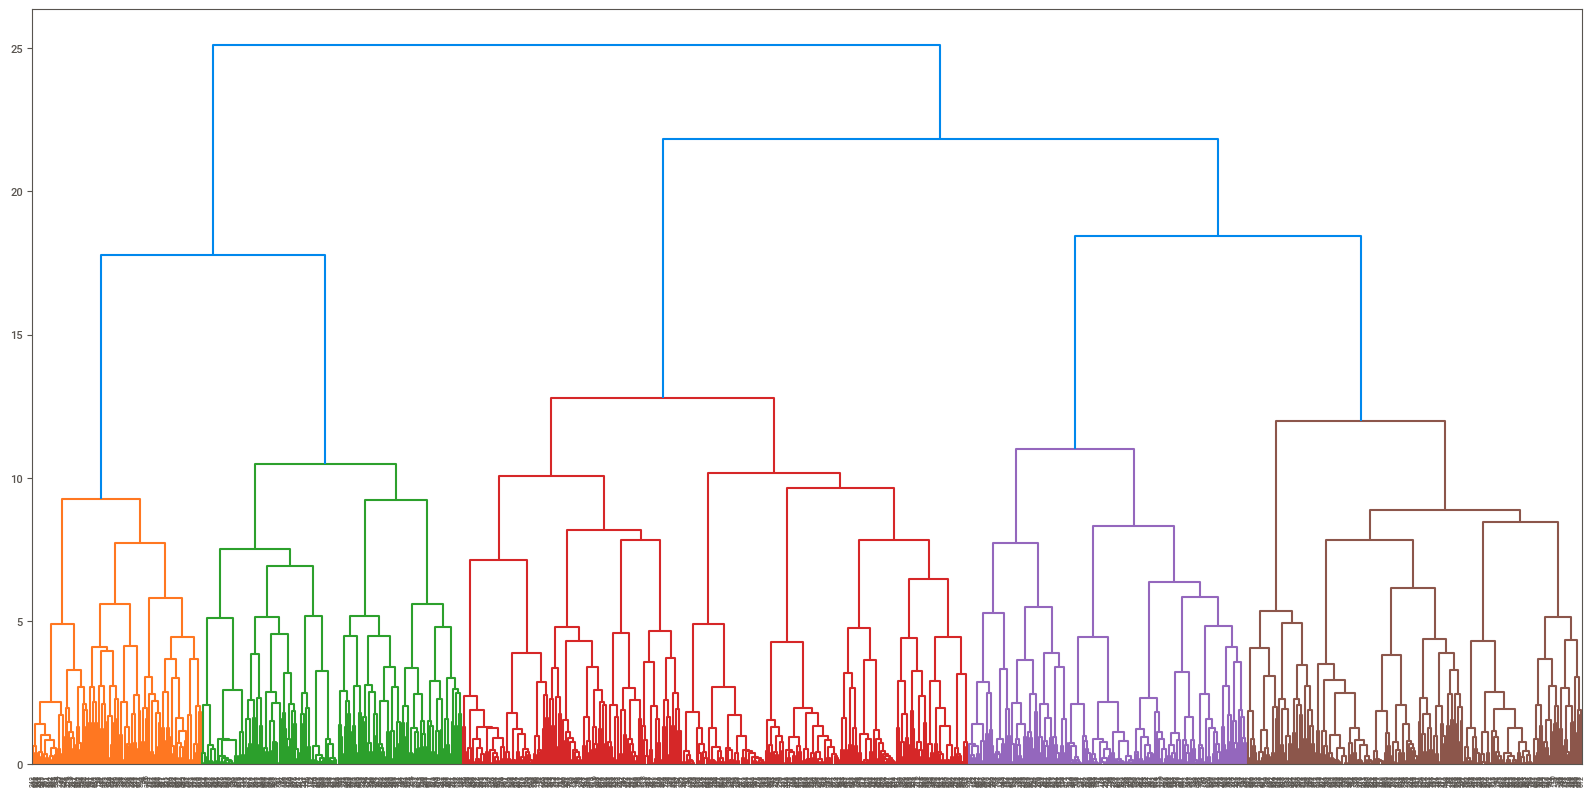

In [39]:
# First try to build a dendrogram
plt.figure(figsize=(20,10))
linkage_ = linkage(data_sc, method='ward')
dendrogram_ = dendrogram(linkage_)

In [40]:
silhouette = []
for i in tqdm(range(2,50)):
    agg = AgglomerativeClustering(n_clusters=i).fit(data_sc)
    labels = agg.labels_
    score = silhouette_score(data_sc, labels)
    silhouette.append(score)

100%|██████████| 48/48 [00:02<00:00, 23.15it/s]


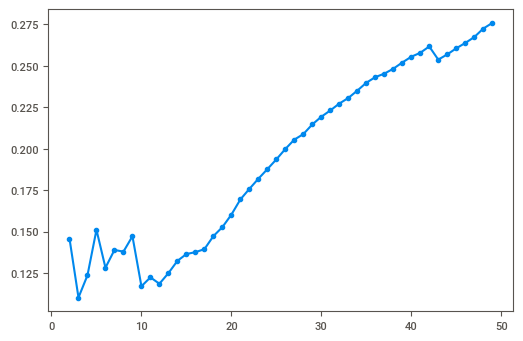

In [41]:
# visualizing the silhouette_score and the related number of clusters
plt.plot(range(2,50), silhouette, marker='o');

* We can see that the silhouette ratio is quite low even for the best number of clusters (roughly - 4 or 5, or for the case where we identify 40- 50 clusters, which is not desirable solution)
* It confirms the data is not very good for cluster idntification via unsupervised learning

In [42]:
agg = AgglomerativeClustering(n_clusters=3).fit(data_sc)
labels = agg.labels_

It will be required to do Dimensionality reduction, which will be done later

### 2.2. DBSCAN in short

In [43]:
dbscan = DBSCAN(eps=1, min_samples=5).fit(data_sc)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'number of clusters: {n_clusters}')
#plt.scatter(data_sc[:,0], data_sc[:,1], c=labels);

number of clusters: 49


In [44]:
np.unique(labels)[np.unique(labels) != -1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
      dtype=int64)

In [45]:
np.delete(np.unique(labels), -1)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
      dtype=int64)

In [46]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,3,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(data_sc)
    labels = dbscan.labels_
    uniq_labels = np.unique(labels)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(data_sc, labels)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|██████████| 29/29 [00:02<00:00, 12.79it/s]


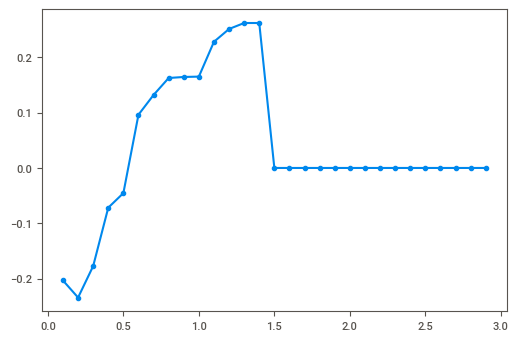

In [47]:
plt.plot(eps_range, silhouette, marker='o');

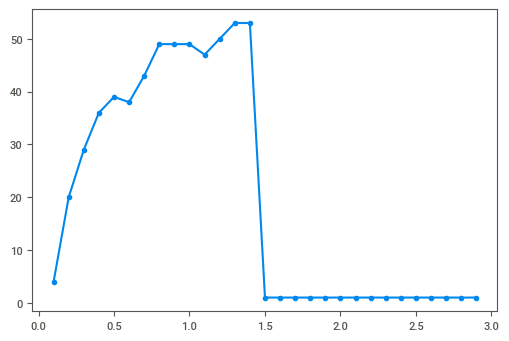

In [48]:
plt.plot(eps_range, clusters, marker='o');

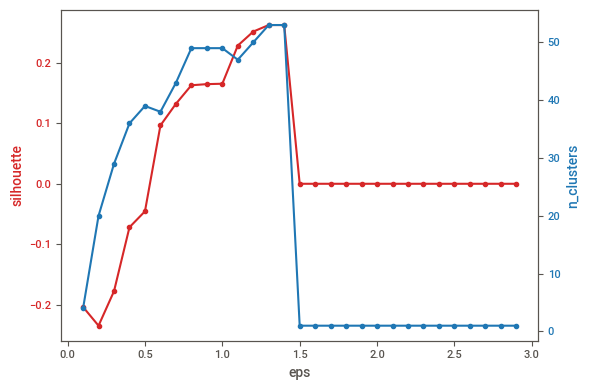

In [49]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(eps_range, silhouette, marker='o', color=color)
ax1.set_xlabel('eps')
ax1.set_ylabel('silhouette', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(eps_range, clusters, marker='o', color=color)
ax2.set_ylabel('n_clusters', color=color)  
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [50]:
def dbscan_clustering(eps_range, data_sc):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(data_sc)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(data_sc, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 19/19 [00:01<00:00, 12.63it/s]


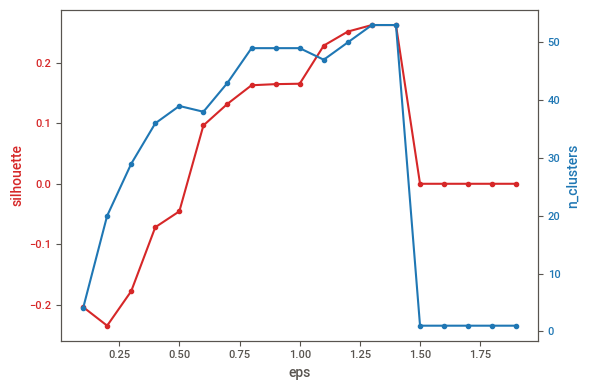

In [51]:
eps_range = np.arange(0.1,2,0.1)
dbscan_clustering(eps_range, data_sc)

In [52]:
dbscan = DBSCAN(eps=1.3, min_samples=5).fit(data_sc)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'number of clusters: {n_clusters}')

number of clusters: 53


* DBSCAN suggests 53 clusters, but it would not be a desired solution

### 2.3. Dimensionality reduction (for visualization) with TSNE

In [53]:
from sklearn.manifold import TSNE

In [54]:
tsne = TSNE(n_components=2, random_state=10)

In [55]:
data_sc.shape

(1000, 26)

In [56]:
X_tsne = tsne.fit_transform(data_sc)

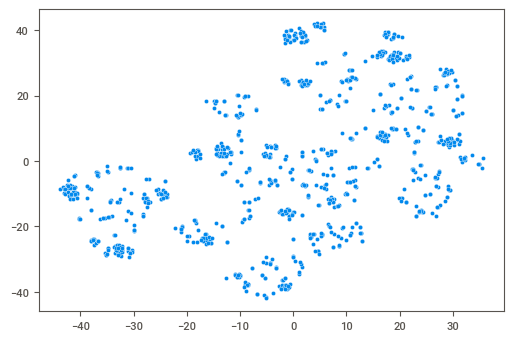

In [57]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

### 2.4. DBSCAN in details

100%|██████████| 90/90 [00:07<00:00, 11.78it/s]


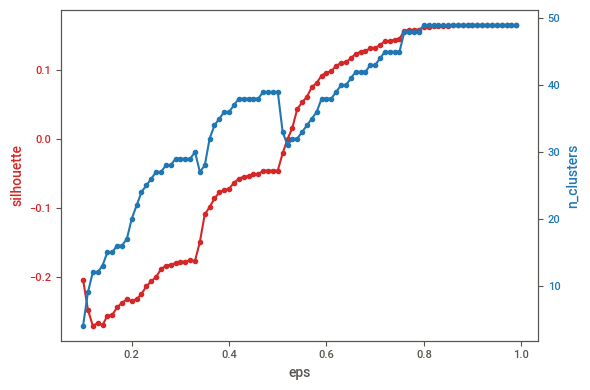

In [58]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, data_sc)

100%|██████████| 260/260 [00:21<00:00, 11.83it/s]


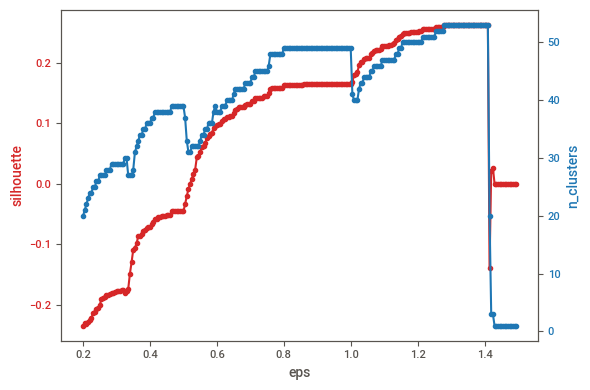

In [59]:
eps_range = np.arange(0.2,1.5,0.005)
dbscan_clustering(eps_range, data_sc)

In [60]:
from sklearn.neighbors import NearestNeighbors

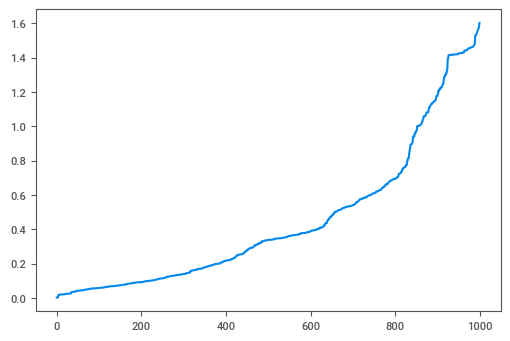

In [61]:
neighbors = NearestNeighbors(n_neighbors=5)
nbrs = neighbors.fit(data_sc)
distance, indices = nbrs.kneighbors(data_sc)
distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)

In [62]:
dbscan = DBSCAN(eps=0.85).fit(data_sc)
labels = dbscan.labels_

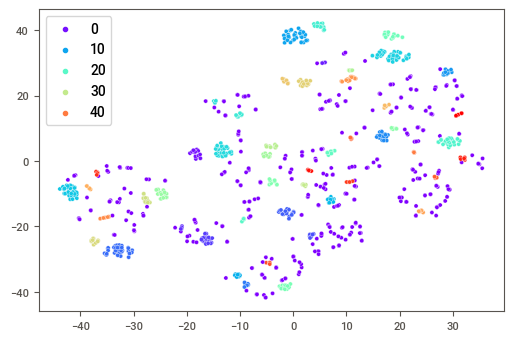

In [63]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [64]:
data_sc['labels'] = labels

In [65]:
data_sc['labels'].value_counts(normalize=True)

-1     0.415
 14    0.037
 10    0.036
 6     0.034
 13    0.029
 15    0.028
 19    0.025
 3     0.019
 5     0.019
 8     0.018
 26    0.017
 22    0.017
 33    0.015
 0     0.015
 23    0.014
 38    0.013
 31    0.012
 9     0.012
 18    0.012
 24    0.011
 32    0.011
 12    0.011
 27    0.010
 29    0.010
 17    0.009
 34    0.009
 11    0.009
 21    0.008
 7     0.008
 46    0.007
 4     0.007
 39    0.007
 37    0.007
 35    0.007
 30    0.006
 25    0.006
 1     0.005
 48    0.005
 28    0.005
 2     0.005
 36    0.005
 20    0.005
 40    0.005
 45    0.005
 41    0.005
 42    0.005
 43    0.005
 16    0.005
 47    0.005
 44    0.005
Name: labels, dtype: float64

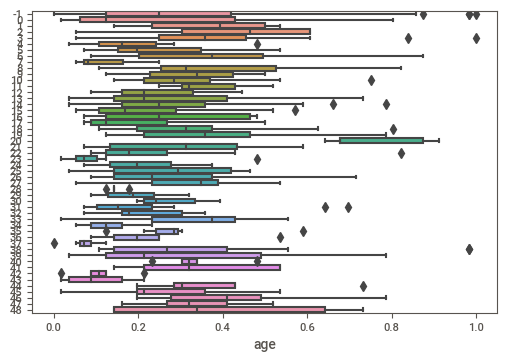

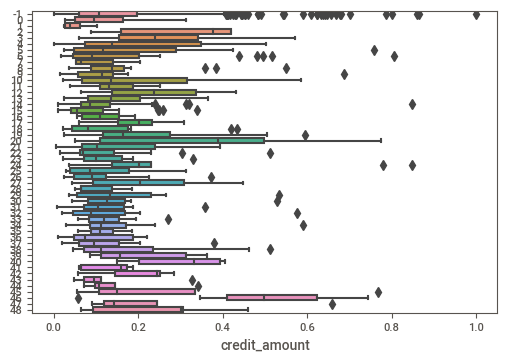

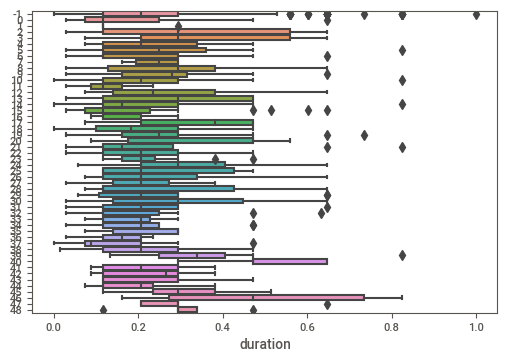

In [66]:
for col in data_sc[['age','credit_amount','duration']].columns:
    sns.boxplot(data=data_sc[['age','credit_amount','duration']], x=col, y=labels, orient='h')
    plt.show();

In [67]:
data_sc.groupby('labels').mean().T.round(2).head()

labels           -1     0     1     2     3     4     5     6     7     8  \
age            0.30  0.24  0.36  0.41  0.38  0.20  0.26  0.39  0.12  0.38   
sex            0.41  1.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00   
job            0.63  0.60  0.47  0.80  0.81  0.67  0.68  0.58  0.58  0.65   
credit_amount  0.16  0.12  0.05  0.29  0.25  0.21  0.18  0.16  0.10  0.16   
duration       0.25  0.20  0.15  0.33  0.36  0.24  0.27  0.20  0.24  0.31   

labels            9    10    11    12    13    14    15    16    17    18  \
age            0.33  0.31  0.35  0.25  0.27  0.30  0.21  0.28  0.20  0.35   
sex            0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  1.00   
job            0.72  0.65  0.59  0.73  0.59  0.64  0.52  0.60  0.70  0.58   
credit_amount  0.14  0.19  0.14  0.24  0.15  0.12  0.09  0.12  0.19  0.14   
duration       0.28  0.24  0.12  0.29  0.27  0.21  0.19  0.16  0.33  0.20   

labels           19    20    21    22    23    24    25    26    27    28  \
age            0.37  0.76  0.31  0.24  0.10  0.20  0.27  0.30  0.32  0.15   
sex            0.00  0.00  0.00  1.00  1.00  0.00  1.00  0.00  0.00  1.00   
job            0.72  0.73  0.67  0.61  0.60  0.64  0.56  0.63  0.67  0.73   
credit_amount  0.21  0.36  0.16  0.13  0.12  0.28  0.12  0.11  0.21  0.10   
duration       0.28  0.35  0.28  0.22  0.22  0.32  0.26  0.27  0.21  0.28   

labels           29    30    31    32    33    34    35    36    37    38  \
age            0.19  0.27  0.24  0.22  0.34  0.14  0.30  0.24  0.07  0.36   
sex            1.00  0.00  1.00  1.00  0.00  1.00  0.00  1.00  1.00  0.00   
job            0.70  0.56  0.61  0.55  0.64  0.70  0.62  0.60  0.57  0.69   
credit_amount  0.17  0.18  0.12  0.14  0.13  0.17  0.12  0.11  0.13  0.19   
duration       0.27  0.31  0.23  0.21  0.18  0.23  0.22  0.15  0.16  0.23   

labels           39    40    41    42    43    44    45    46    47    48  
age            0.32  0.34  0.35  0.11  0.10  0.39  0.26  0.42  0.34  0.40  
sex            0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  
job            0.62  0.73  0.60  0.67  0.60  0.60  0.67  0.76  0.80  0.73  
credit_amount  0.21  0.30  0.13  0.20  0.13  0.15  0.28  0.48  0.25  0.24  
duration       0.37  0.51  0.22  0.23  0.26  0.20  0.31  0.50  0.33  0.30

* DBSCAN is not the best model for this use case
* DBSCAN certanly defines some interesting groups, but the target of segmentation is hardly can be achived
 

### 2.5. KMeans method

In [68]:
#data_sc

In [69]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init=10).fit(data_sc.iloc[:, :-1])
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

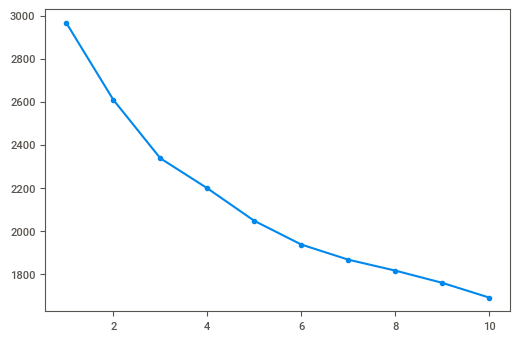

In [70]:
plt.plot(range(1,11), inertia, marker='o');

In [71]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

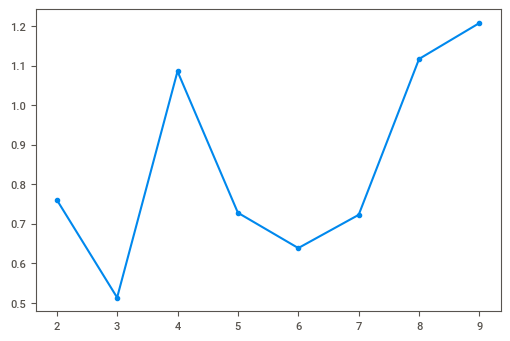

In [72]:
plt.plot(range(2,10), D, marker='o');

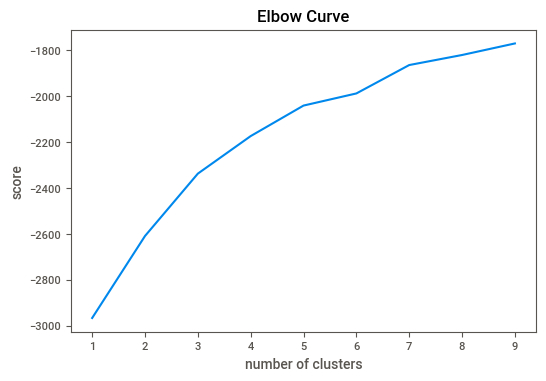

In [73]:
# Use the method of calculating the optimal number of clusters
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(data_sc.iloc[:, :-1]).score(data_sc.iloc[:, :-1]) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('number of clusters')
plt.ylabel('score')
plt.title('Elbow Curve')
plt.show()

* The diagram shows that the optimal number of clusters is 3-4
* Inertia (above) is showing as well  3 clusters (inertia is minimum)

In [74]:
# Take the number of clusters equal to 3 for calculations 
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(data_sc.iloc[:, :-1])
labels = kmeans.labels_

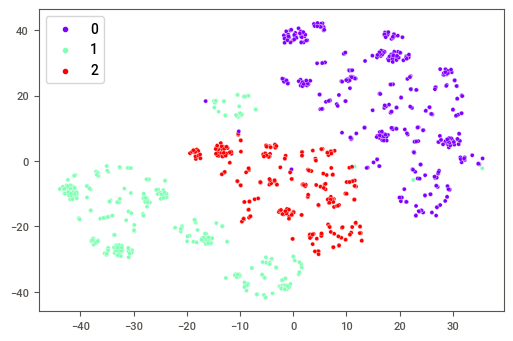

In [75]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [76]:
# Save the cluster labels in a new field of our dataset
data['labels'] = labels

In [77]:
# See the size of groups/clusters
data.groupby('labels').size()

labels
0    411
1    319
2    270
dtype: int64

In [78]:
# Display statistics on the average values of our features for the cluster
data.groupby('labels').mean().round()

age  job  credit_amount  duration
labels                                    
0       36.0  2.0  3078.0         20.0    
1       36.0  2.0  3058.0         21.0    
2       34.0  2.0  3818.0         23.0

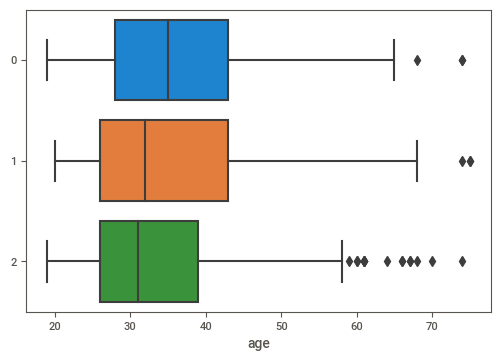

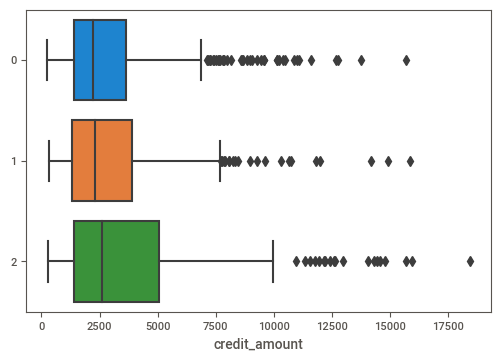

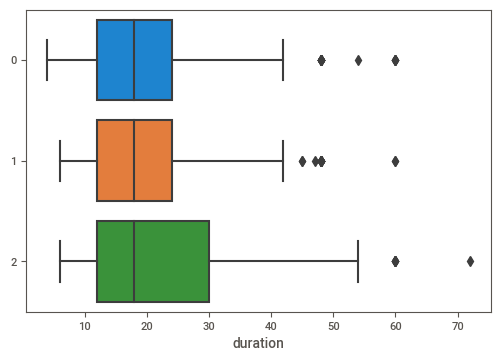

In [79]:
for col in data[['age','credit_amount','duration']].columns:
    sns.boxplot(data=data[['age','credit_amount','duration']], x=col, y=labels, orient='h')
    plt.show();

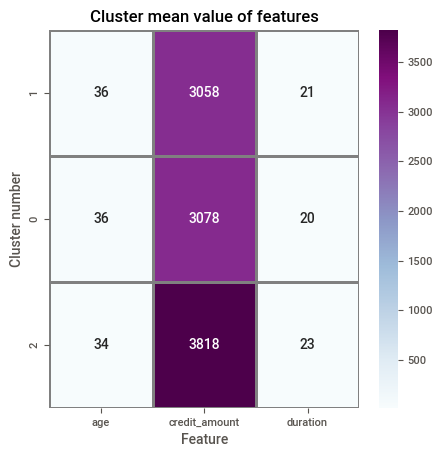

In [80]:
# Visualize means by clusters using a heat map
plt.figure(figsize = (5,5))
sns.heatmap(data=data.groupby('labels')['age','credit_amount','duration'].mean()\
            .sort_values(by='credit_amount'), annot = True, linewidths=1, linecolor='grey',cmap="BuPu"\
            ,fmt='.0f', annot_kws={"size": 10})
plt.xticks(rotation=0) 
plt.title('Cluster mean value of features')
plt.ylabel('Cluster number')
plt.xlabel('Feature')
plt.show()

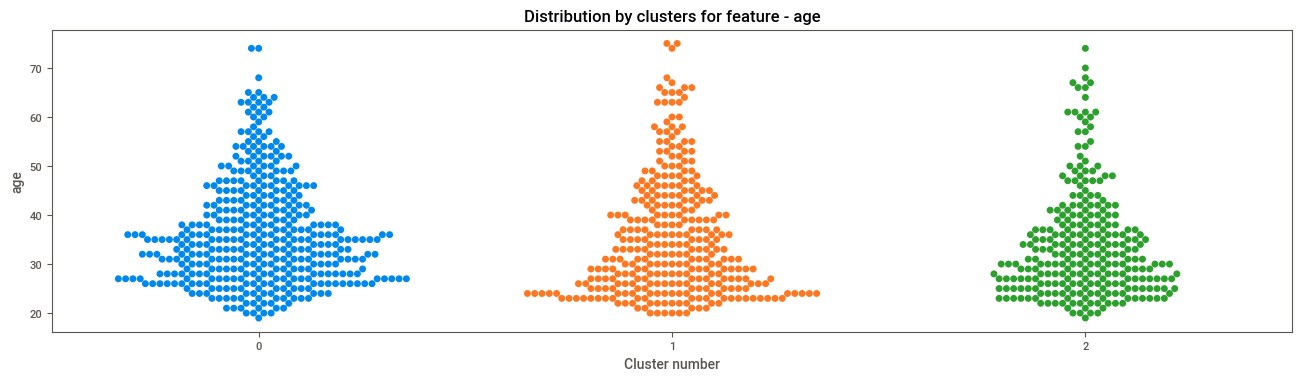

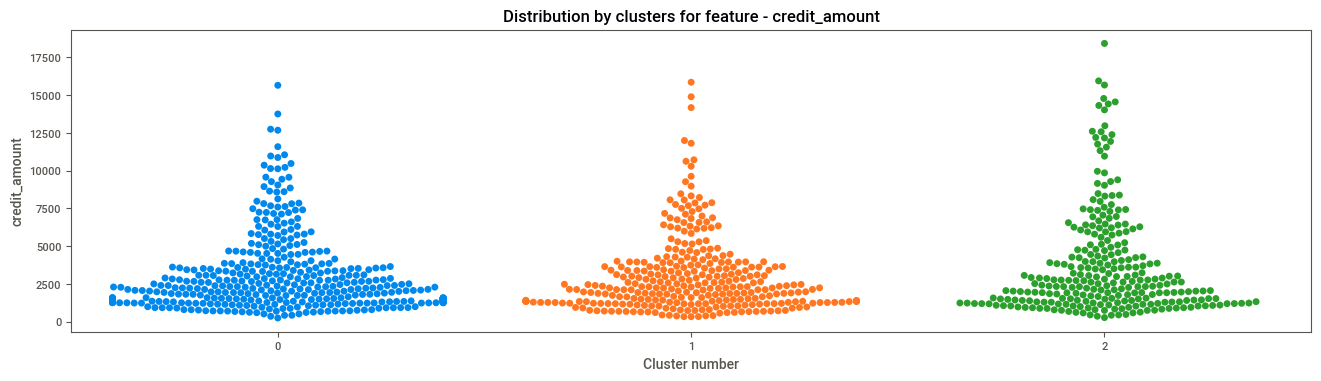

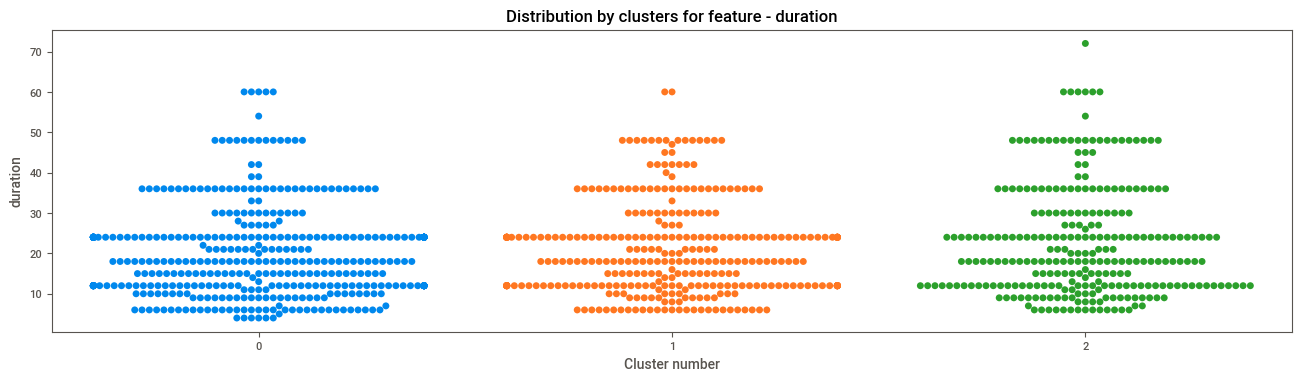

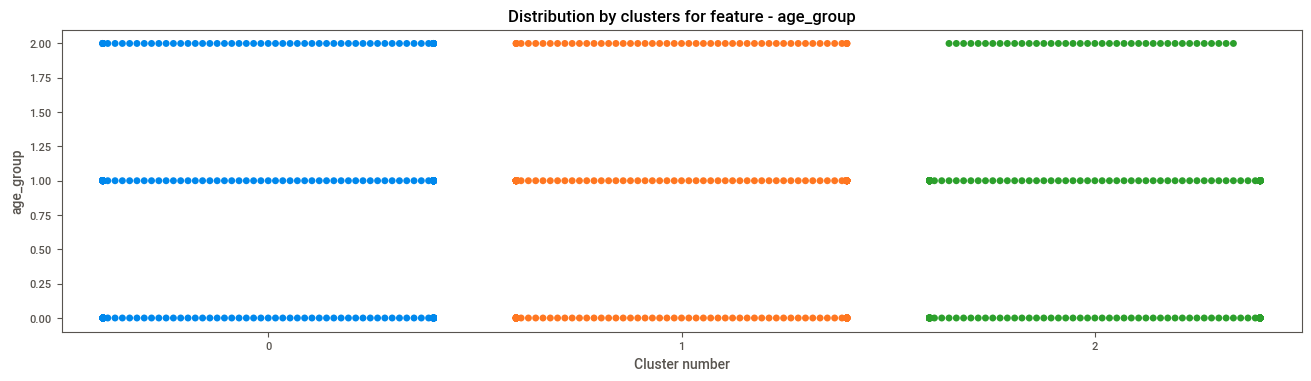

In [81]:
# Visualize the resulting clusters for continuous values
for column in data.drop(columns = ['sex','job','housing','saving_acc','checking_acc','purpose','labels']).columns:
    fig, ax = plt.subplots(figsize=(16,4))
    sns.swarmplot(data.labels,data[column], ax=ax)
    plt.title('Distribution by clusters for feature - '+ str(column))
    plt.xlabel('Cluster number')
    plt.show()

* Kmeans suggests clusters with the visible difference and it suggests to get 3 clusters
* At the same time, median values of all features are very close to each other (see the box plots)

In [82]:
# Group into clusters by age_group
data_grouped = data.groupby(['labels', 'age_group'])['credit_amount'].agg({'median','count'}).round(2).\
                sort_values(by='labels').reset_index()
data_grouped.columns = ['Cluster number', 'age_group code', 'number of customers', 'cerdit_amount (median)']
data_grouped

Cluster number  age_group code  number of customers  cerdit_amount (median)
0  0               0               126                  2170.0                
1  0               1               223                  2375.0                
2  0               2               62                   1865.5                
3  1               0               133                  2214.0                
4  1               1               135                  2303.0                
5  1               2               51                   2249.0                
6  2               0               112                  2324.5                
7  2               1               118                  2599.0                
8  2               2               40                   3317.5

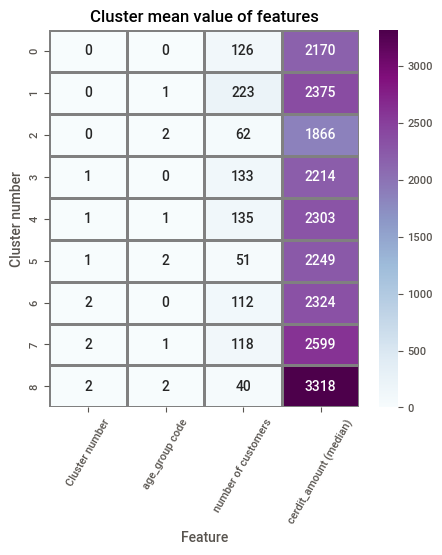

In [83]:
# Visualize medians by clusters using a heat map
plt.figure(figsize = (5,5))
sns.heatmap(data=data_grouped, annot = True, linewidths=1, linecolor='grey',cmap="BuPu"\
            ,fmt='.0f', annot_kws={"size": 10})
plt.xticks(rotation=60) 
plt.title('Cluster mean value of features')
plt.ylabel('Cluster number')
plt.xlabel('Feature')
plt.show()

In [84]:
#data.query('labels == 2')['purpose'].value_counts()

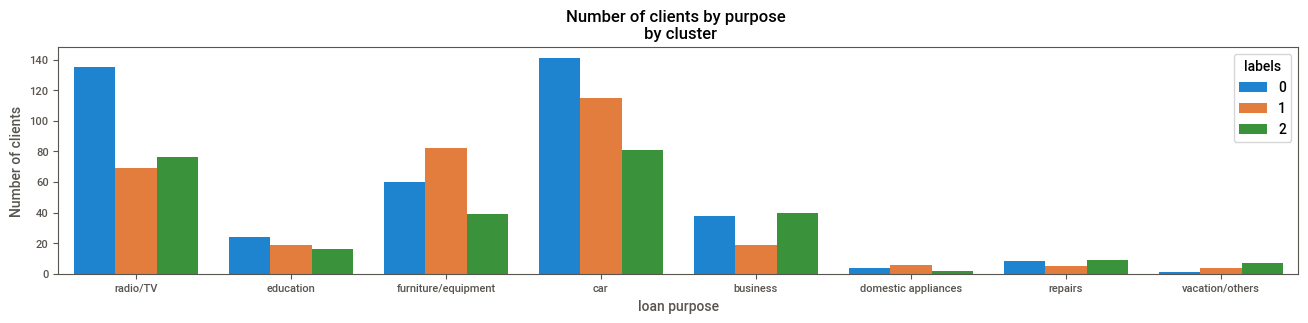

In [85]:
# Visualize clusters by purpose
fig, ax = plt.subplots(figsize=(16,3))
sns.countplot(x='purpose',hue='labels',data=data, ax=ax)
plt.title('Number of clients by purpose \n by cluster')
plt.ylabel('Number of clients')
plt.xlabel('loan purpose')
plt.show()

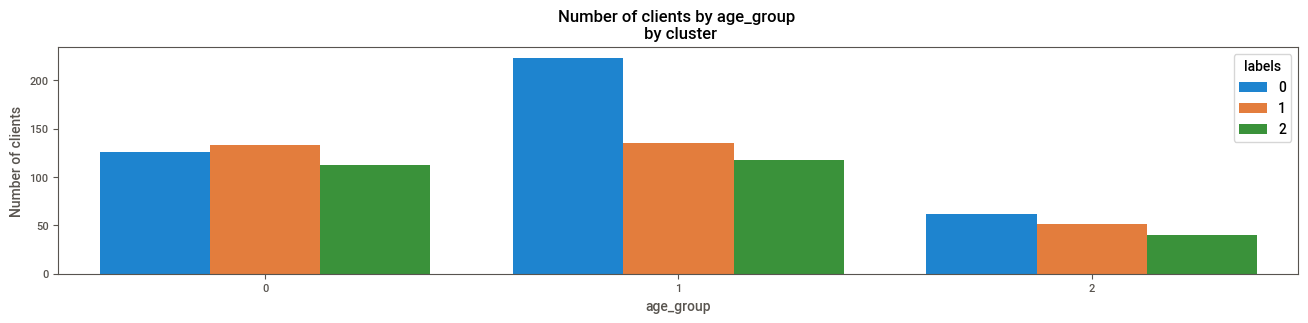

In [86]:
# Visualize clusters by age_group
fig, ax = plt.subplots(figsize=(16,3))
sns.countplot(x='age_group',hue='labels',data=data, ax=ax)
plt.title('Number of clients by age_group \n by cluster')
plt.ylabel('Number of clients')
plt.xlabel('age_group')
plt.show()

### 2.6. AgglomerativeClustering¶ 

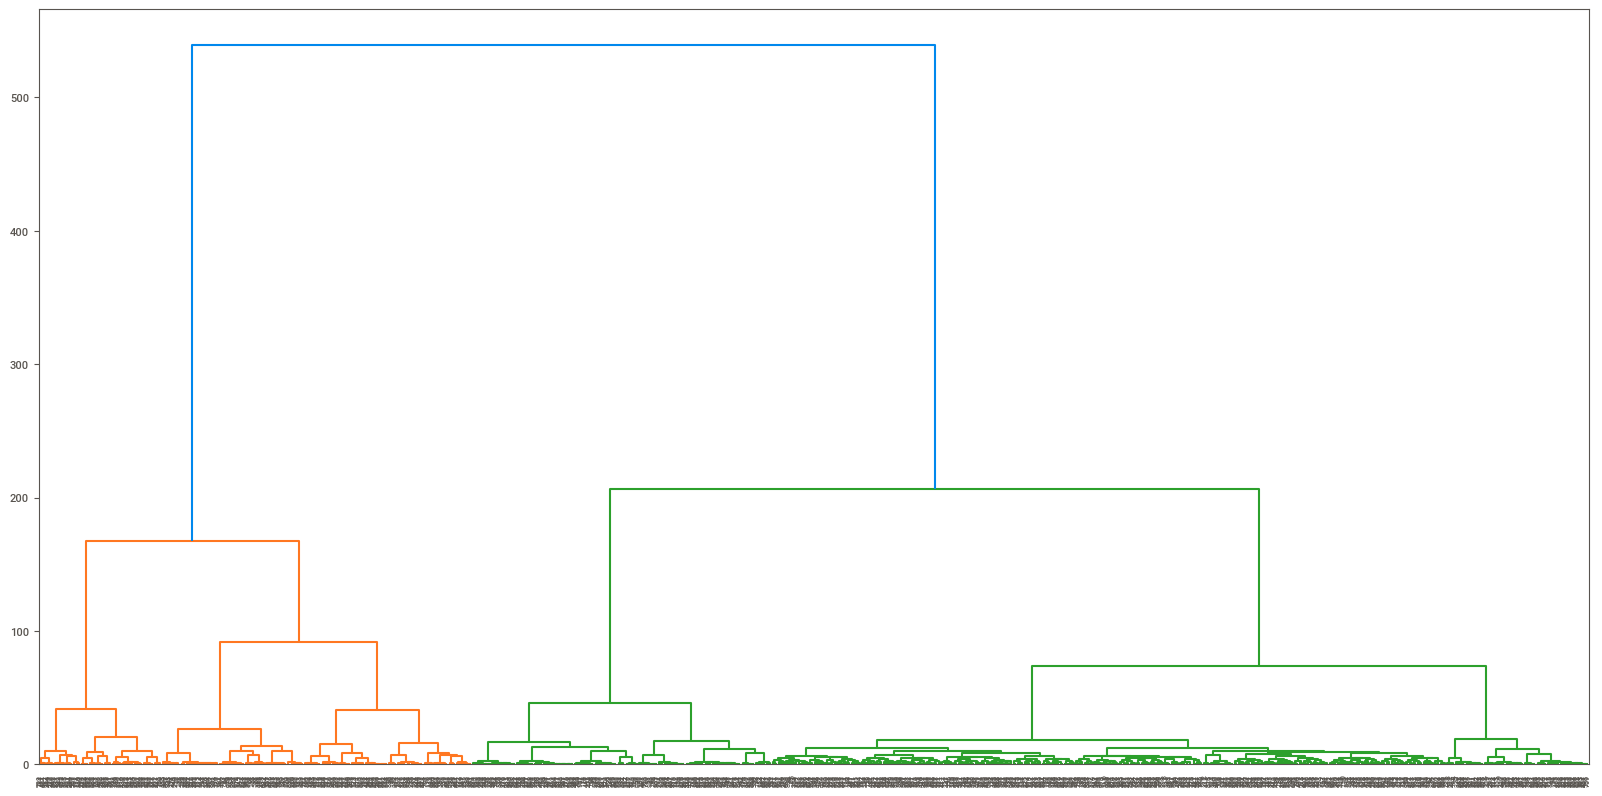

In [87]:
plt.figure(figsize=(20,10))
linkage_ = linkage(data_sc, method='ward')
dendrogram_ = dendrogram(linkage_)

In [88]:
silhouette = []
for i in tqdm(range(2,20)):
    agg = AgglomerativeClustering(n_clusters=i).fit(data_sc.iloc[:, :-1])
    labels = agg.labels_
    score = silhouette_score(data_sc.iloc[:, :-1], labels)
    silhouette.append(score)

100%|██████████| 18/18 [00:00<00:00, 23.05it/s]


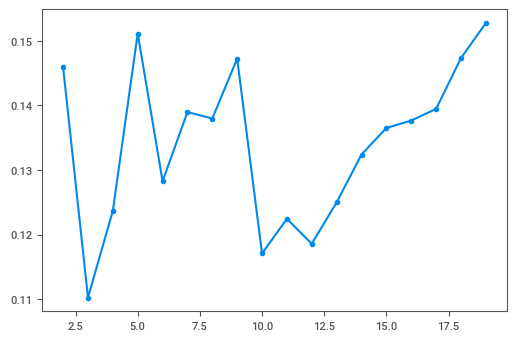

In [89]:
plt.plot(range(2,20), silhouette, marker='o');

In [90]:
agg = AgglomerativeClustering(n_clusters=5).fit(data_sc.iloc[:, :-1])
labels = agg.labels_

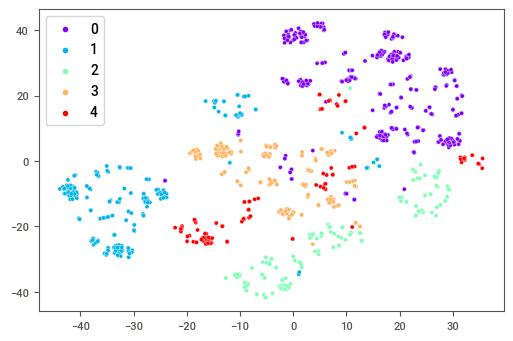

In [91]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [92]:
data['labels'] = labels

In [93]:
data['labels'].value_counts(normalize=True)

0    0.327
1    0.216
3    0.180
2    0.168
4    0.109
Name: labels, dtype: float64

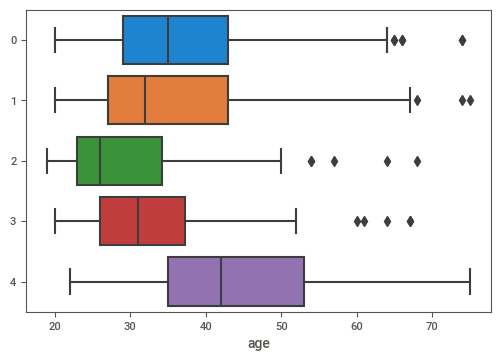

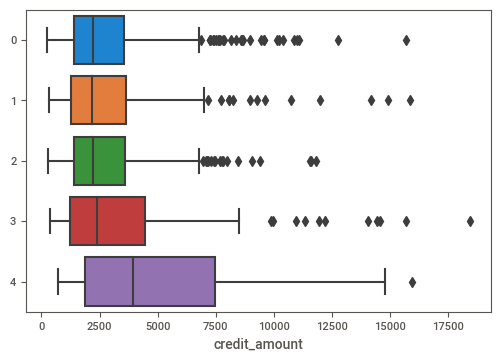

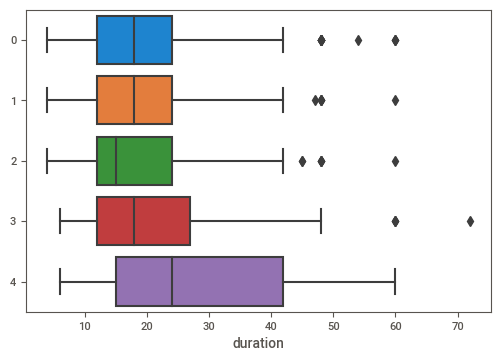

In [94]:
for col in data[['age','credit_amount','duration']].columns:
    sns.boxplot(data=data[['age','credit_amount','duration']], x=col, y=labels, orient='h')
    plt.show();

In [95]:
data.groupby('labels').median().T.round()

labels              0       1       2       3       4
age            35.0    32.0    26.0    31.0    42.0  
job            2.0     2.0     2.0     2.0     2.0   
credit_amount  2197.0  2158.0  2228.0  2368.0  3931.0
duration       18.0    18.0    15.0    18.0    24.0

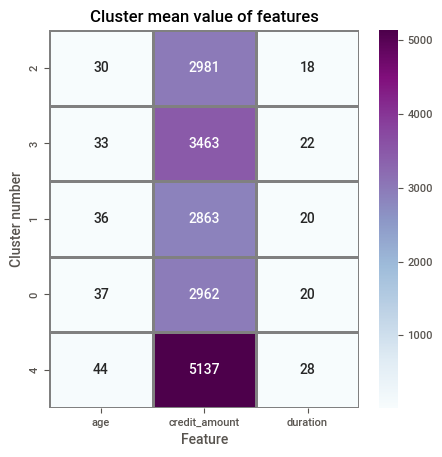

In [96]:
# Visualize means by clusters using a heat map
plt.figure(figsize = (5,5))
sns.heatmap(data=data.groupby('labels')['age','credit_amount','duration'].mean()\
            .sort_values(by='age'), annot = True, linewidths=1, linecolor='grey',cmap="BuPu"\
            ,fmt='.0f', annot_kws={"size": 10})
plt.xticks(rotation=0) 
plt.title('Cluster mean value of features')
plt.ylabel('Cluster number')
plt.xlabel('Feature')
plt.show()

In [97]:
# Group into clusters by 
data_grouped0 = data.groupby(['labels', 'age_group'])['credit_amount'].agg({'median','count'}).round().\
                sort_values(by='labels').reset_index()
data_grouped0.columns = ['Cluster number', 'age_group code', 'number of customers', 'cdeit_amount (median)']
data_grouped0

Cluster number  age_group code  number of customers  cdeit_amount (median)
0   0               0               88                   2170.0               
1   0               1               184                  2382.0               
2   0               2               55                   1595.0               
3   1               0               87                   2327.0               
4   1               1               95                   2171.0               
5   1               2               34                   1866.0               
6   2               0               110                  2216.0               
7   2               1               50                   2238.0               
8   2               2               8                    2224.0               
9   3               0               76                   2070.0               
10  3               1               85                   2415.0               
11  3               2               19                   3872.0               
12  4               0               10                   3658.0               
13  4               1               62                   5202.0               
14  4               2               37                   3069.0

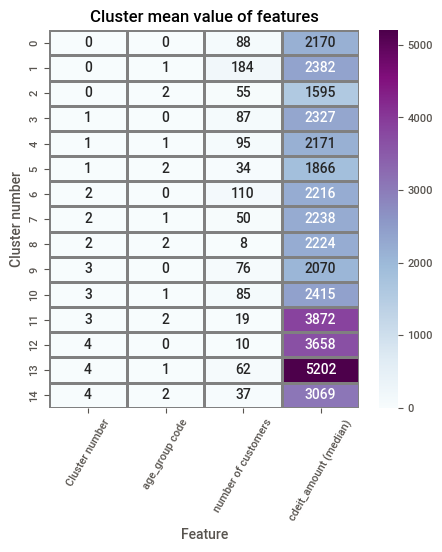

In [98]:
# Visualize medians by clusters using a heat map
plt.figure(figsize = (5,5))
sns.heatmap(data=data_grouped0, annot = True, linewidths=1, linecolor='grey',cmap="BuPu"\
            ,fmt='.0f', annot_kws={"size": 10})
plt.xticks(rotation=60) 
plt.title('Cluster mean value of features')
plt.ylabel('Cluster number')
plt.xlabel('Feature')
plt.show()

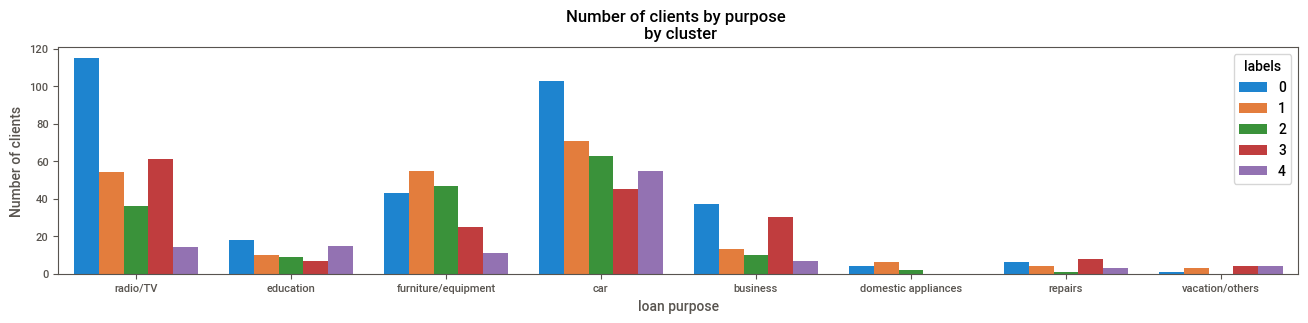

In [99]:
# Visualize clusters by purpose
fig, ax = plt.subplots(figsize=(16,3))
sns.countplot(x='purpose',hue='labels',data=data, ax=ax)
plt.title('Number of clients by purpose \n by cluster')
plt.ylabel('Number of clients')
plt.xlabel('loan purpose')
plt.show()

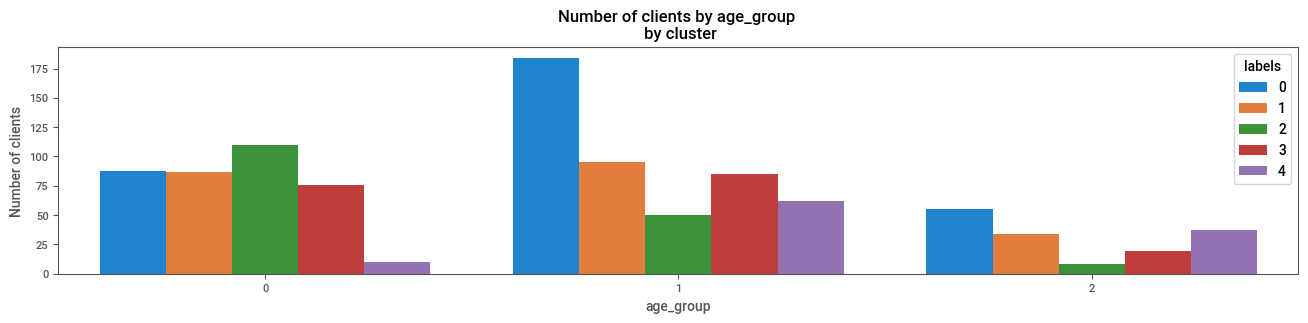

In [100]:
# Visualize clusters by age_group
fig, ax = plt.subplots(figsize=(16,3))
sns.countplot(x='age_group',hue='labels',data=data, ax=ax)
plt.title('Number of clients by age_group \n by cluster')
plt.ylabel('Number of clients')
plt.xlabel('age_group')
plt.show()

* There are visible difference between clusters 8see the box plots with medians)
* Most visible is the cluster 4 with the biggest amount, duration and age
* At the same time, other clusters are separated, but have no visible different values
* Although it was recomended to split to 5 clusters, most likely 3 or 4 would work better

<a id="conclusion"></a>
## 3. Results and recomendations

* Overall the Kmeans or AgglomerativeClustering can be used for this task, considering the type, volume and quality of the current dataset
* DBSCAN is not recommeded as it did not see viisible groups due to the data quality or other data characteristics
* Kmeans on a diagram (with data dimensially reduced) shows clusters quiete well, but on the real labeled data the clusters are almost not visible and all features have the same medians
* I personally would suggest AgglomerativeClustering for further usage for this task

* In AgglomerativeClustering the 4 cluster seems to be interesting - we can see clearly different groups of customers and can interact with them individually
* Cluster 4 is the customers with bigger amount, older age, longer duration. Mostly male, interesting in cars.
* For better cluster definition more data would be required
* Also, I will modify the data set and build the same based only on numeric data, without categorical ones.